In [21]:
# https://medium.com/@sachinsoni600517/mastering-hierarchical-clustering-from-basic-to-advanced-5e770260bf93

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import fcluster

from scipy.spatial.distance import pdist, squareform

In [2]:
df = pd.read_csv('input.csv')
df

,country,life_exp,monthly_salary
0,England,70,3000
1,Bolivia,50,700
2,France,80,2500
3,Colombia,55,900
4,USA,73,3500


### Scale the data

In [4]:
# Select only the numeric columns
numeric_data = df[['life_exp', 'monthly_salary']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_data


array([[ 0.38976227,  0.78222995],
       [-1.38188441, -1.26223469],
       [ 1.27558561,  0.33778111],
       [-0.93897274, -1.08445516],
       [ 0.65550927,  1.22667878]])

### Distance matrix - Euklidean

<img src="pics/vek.png" style="width: 30%;"/>

In [25]:
# Compute the pairwise distance matrix (Euclidean distance)
distance_matrix = pdist(scaled_data, metric='euclidean')

# Convert the distance matrix into a square form
distance_matrix_square = squareform(distance_matrix)
distance_matrix_square

array([[0.        , 2.70528512, 0.991069  , 2.29129876, 0.51783804],
       [2.70528512, 0.        , 3.10196671, 0.47725916, 3.21646751],
       [0.991069  , 3.10196671, 0.        , 2.63192414, 1.08380521],
       [2.29129876, 0.47725916, 2.63192414, 0.        , 2.80779503],
       [0.51783804, 3.21646751, 1.08380521, 2.80779503, 0.        ]])

In [26]:
distance_matrix

array([2.70528512, 0.991069  , 2.29129876, 0.51783804, 3.10196671,
       0.47725916, 3.21646751, 2.63192414, 1.08380521, 2.80779503])

### Clustering

In [27]:
''' 
When using complete linkage (max distance) in hierarchical clustering, 
the algorithm can create new clusters that are farther from the current cluster, allowing for the possibility 
of forming different clusters outside of the current one. 
'''

' \nWhen using complete linkage (max distance) in hierarchical clustering, \nthe algorithm can create new clusters that are farther from the current cluster, allowing for the possibility \nof forming different clusters outside of the current one. \n'

<img src="pics/linkage-max.png" style="width: 45%;"/>

In [ ]:
# Perform hierarchical clustering 
# Since the linkage must be a vector we take just the values above the diagonal from the distance matrix

# Linkage matrix records the merging processes
Z = linkage(distance_matrix, method='complete')
Z

array([[1.        , 3.        , 0.47725916, 2.        ],
       [0.        , 4.        , 0.51783804, 2.        ],
       [2.        , 6.        , 1.08380521, 3.        ],
       [5.        , 7.        , 3.21646751, 5.        ]])

<img src="pics/z-matrix2.png" style="width: 50%;"/>

### Dendogram

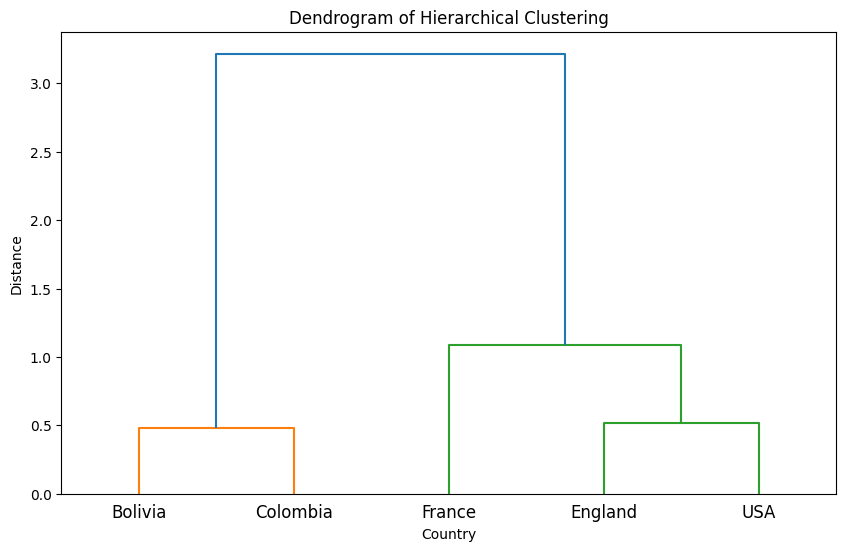

In [29]:
# Create the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=df['country'].values)
plt.title("Dendrogram of Hierarchical Clustering")
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

### Assign clusters

In [30]:
# Set a threshold distance for cutting the dendrogram
distance_threshold = 1.5  # You can adjust this value as needed

# Assign clusters based on the distance threshold
clusters = fcluster(Z, t=distance_threshold, criterion='distance')

# Add the cluster labels to the DataFrame
df['cluster'] = clusters

print(df)

    country  life_exp  monthly_salary  cluster
0   England        70            3000        2
1   Bolivia        50             700        1
2    France        80            2500        2
3  Colombia        55             900        1
4       USA        73            3500        2
